<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/MACD_Stochastic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
pip install yfinance

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
%matplotlib inline

In [52]:
df = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1.158750,1.160714,1.143393,1.150000,0.985970,278588800
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.968976,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.978928,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.987501,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.988267,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.060224,2227450400


In [53]:
df.tail(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500
2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.919998,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,172.000000,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,172.169998,86580100


In [54]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [55]:
df.tail(6)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500,4.699999,5.022983
2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900,4.818780,4.982143
2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400,4.672654,4.920245
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.919998,94537600,4.123607,4.760917
2022-01-06,172.699997,175.300003,171.639999,172.000000,172.000000,96904000,3.413516,4.491437
2022-01-07,172.889999,174.139999,171.029999,172.169998,172.169998,86580100,2.831837,4.159517


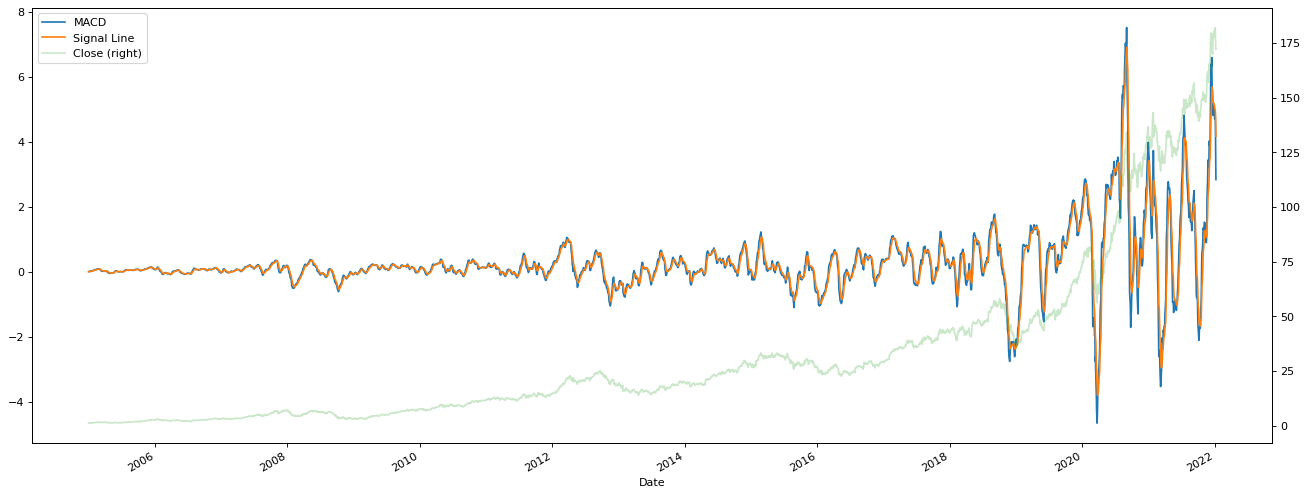

In [66]:
fig, ax = plt.subplots(figsize=(20,8), dpi=80)
df[['MACD', 'Signal Line']].plot(ax=ax)
df[['Close']].plot(ax=ax, alpha=0.25, secondary_y=True)
plt.show();

In [67]:
high14 = df['High'].rolling(14).max()
low14 = df['Low'].rolling(14).max()
df['%K'] = (df['Close'] - low14)*100/(high14 - low14)
df['%D'] = df['%K'].rolling(3).mean()

In [68]:
df.tail(11)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,%K,%D
Date,,,,,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600,4.805845,5.205320,11.363626,-8.484810
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600,5.051209,5.174498,64.426804,25.819032
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300,5.102919,5.160182,21.110909,32.300446
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,62348900,5.092459,5.146637,23.611238,36.382984
2021-12-30,179.470001,180.570007,178.089996,178.199997,178.199997,59773000,4.932099,5.103730,-9.166707,11.851814
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500,4.699999,5.022983,-26.666400,-4.073956
2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900,4.818780,4.982143,79.999798,14.722230
2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400,4.672654,4.920245,15.183271,22.838889
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.919998,94537600,4.123607,4.760917,-109.947364,-4.921432


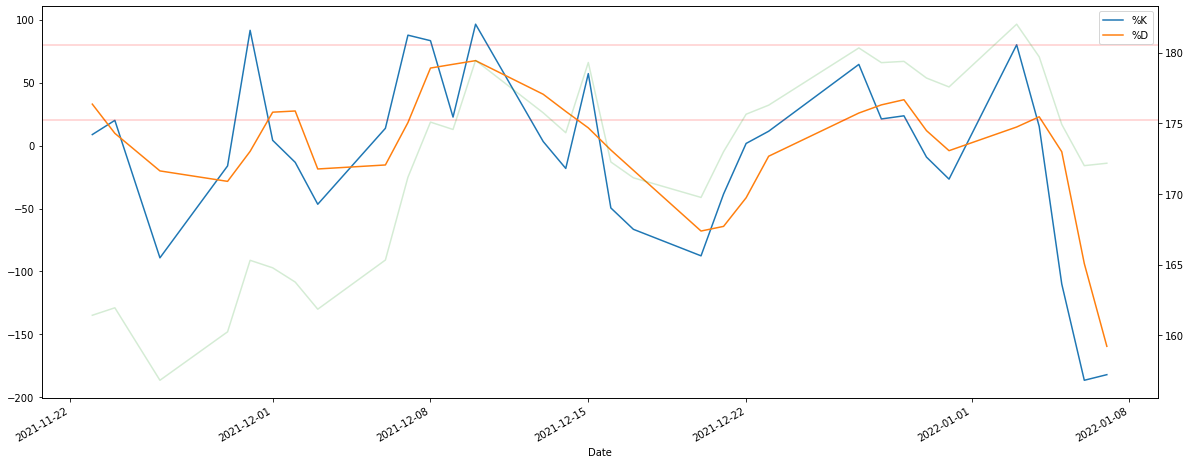

In [79]:
fig, ax = plt.subplots(figsize=(20,8))
df[['%K', '%D']].loc['2021-11-23':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.2)
ax.axhline(20, c='r', alpha=0.2)
df['Close'].loc['2021-11-23':].plot(ax=ax, alpha=0.2, secondary_y=True)